# NPCI Upskilling - Data Science and Engineering Track

## A program by IIITH and TalentSprint

### Playground Challenge 4: BitCoin_Forecasting_ARMA [20 points]


##<b><font color="red">Please run this solution notebook on your Google Colab T4 GPU runtime</font></b>

To select the T4 GPU, follow these steps:

Runtime >> Change runtime type >> T4 GPU >> save

## Learning Objectives

At the end of the experiment, you will be able to :

* perform EDA on time series data
* analyze the auto correlation and partial auto correlation plots
* implement the ARMA model and forecast the bit coin price

## Dataset



Bitcoin is a digital currency created in January 2009. It follows the ideas set out in a whitepaper by the mysterious and pseudonymous Satoshi Nakamoto. The identity of the person or persons who created the technology is still a mystery. Bitcoin offers the promise of lower transaction fees than traditional online payment mechanisms and, unlike government-issued currencies, it is operated by a decentralized authority.

Data Description
This dataset provides the history of daily prices of Bitcoin. The data starts from 17-Sep-2014 and is updated till 09-July-2021. All the column descriptions are provided below.

* Date: Day/Month/Year
* Open: Price from the first transaction of a trading day
* High: Maximum price in a trading day
* Low: Minimum price in a trading day
* Close: Price from the last transaction of a trading day
* Adj Close: Closing price adjusted to reflect the value after accounting for any corporate actions
* Volume: Number of units traded in a day

## Problem Statement

Perform EDA and forecast the Bitcoin price using ARMA model on timeseries (bitcoin) data.

## Grading = 20 Points

In [ ]:
#@title Download Dataset
!wget -qq !wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/BTC.csv
print("Dataset downloaded successfully!!")

Dataset downloaded successfully!!


### Import required Packages

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima.model import ARIMA # Import ARIMA

### Load the data and perform EDA [4 points]

Hint: Refer to this ['Bitcoin dataset EDA'](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module6/M6_SNB_MiniProject_3_BitCoin_Forecasting_ARMA_Exploratory%20Data%20Analysis.pdf)

In [ ]:
# Set plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)


In [ ]:
# YOUR CODE HERE
print("="*60)
print("STEP 1: Loading Data and Performing EDA")
print("="*60)
# Load the dataset
df = pd.read_csv('BTC.csv', index_col='Date', parse_dates=True)

# Display the first few rows
print(df.head())

STEP 1: Loading Data and Performing EDA
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

                Volume  
Date                    
2014-09-17  21056800.0  
2014-09-18  34483200.0  
2014-09-19  37919700.0  
2014-09-20  36863600.0  
2014-09-21  26580100.0  


In [ ]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

Dataset Shape: (2520, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2014-09-17 to 2021-08-10
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2520 non-null   float64
 1   High        2520 non-null   float64
 2   Low         2520 non-null   float64
 3   Close       2520 non-null   float64
 4   Adj Close   2520 non-null   float64
 5   Volume      2520 non-null   float64
 6   Close_diff  2519 non-null   float64
dtypes: float64(7)
memory usage: 157.5 KB
None

First 5 rows:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990 

In [ ]:
# Get information about the DataFrame
print(df.info())
# Check for any missing values
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2014-09-17 to 2021-08-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   float64
dtypes: float64(6)
memory usage: 137.8 KB
None

Missing values:
 Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64


In [ ]:
# Handle missing values using forward fill
df.ffill(inplace=True)

# Verify the changes
print(df.info())
print("\nMissing values after cleaning:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2014-09-17 to 2021-08-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2520 non-null   float64
 1   High       2520 non-null   float64
 2   Low        2520 non-null   float64
 3   Close      2520 non-null   float64
 4   Adj Close  2520 non-null   float64
 5   Volume     2520 non-null   float64
dtypes: float64(6)
memory usage: 137.8 KB
None

Missing values after cleaning:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### Analyze the correlation (heatmap) of all the features

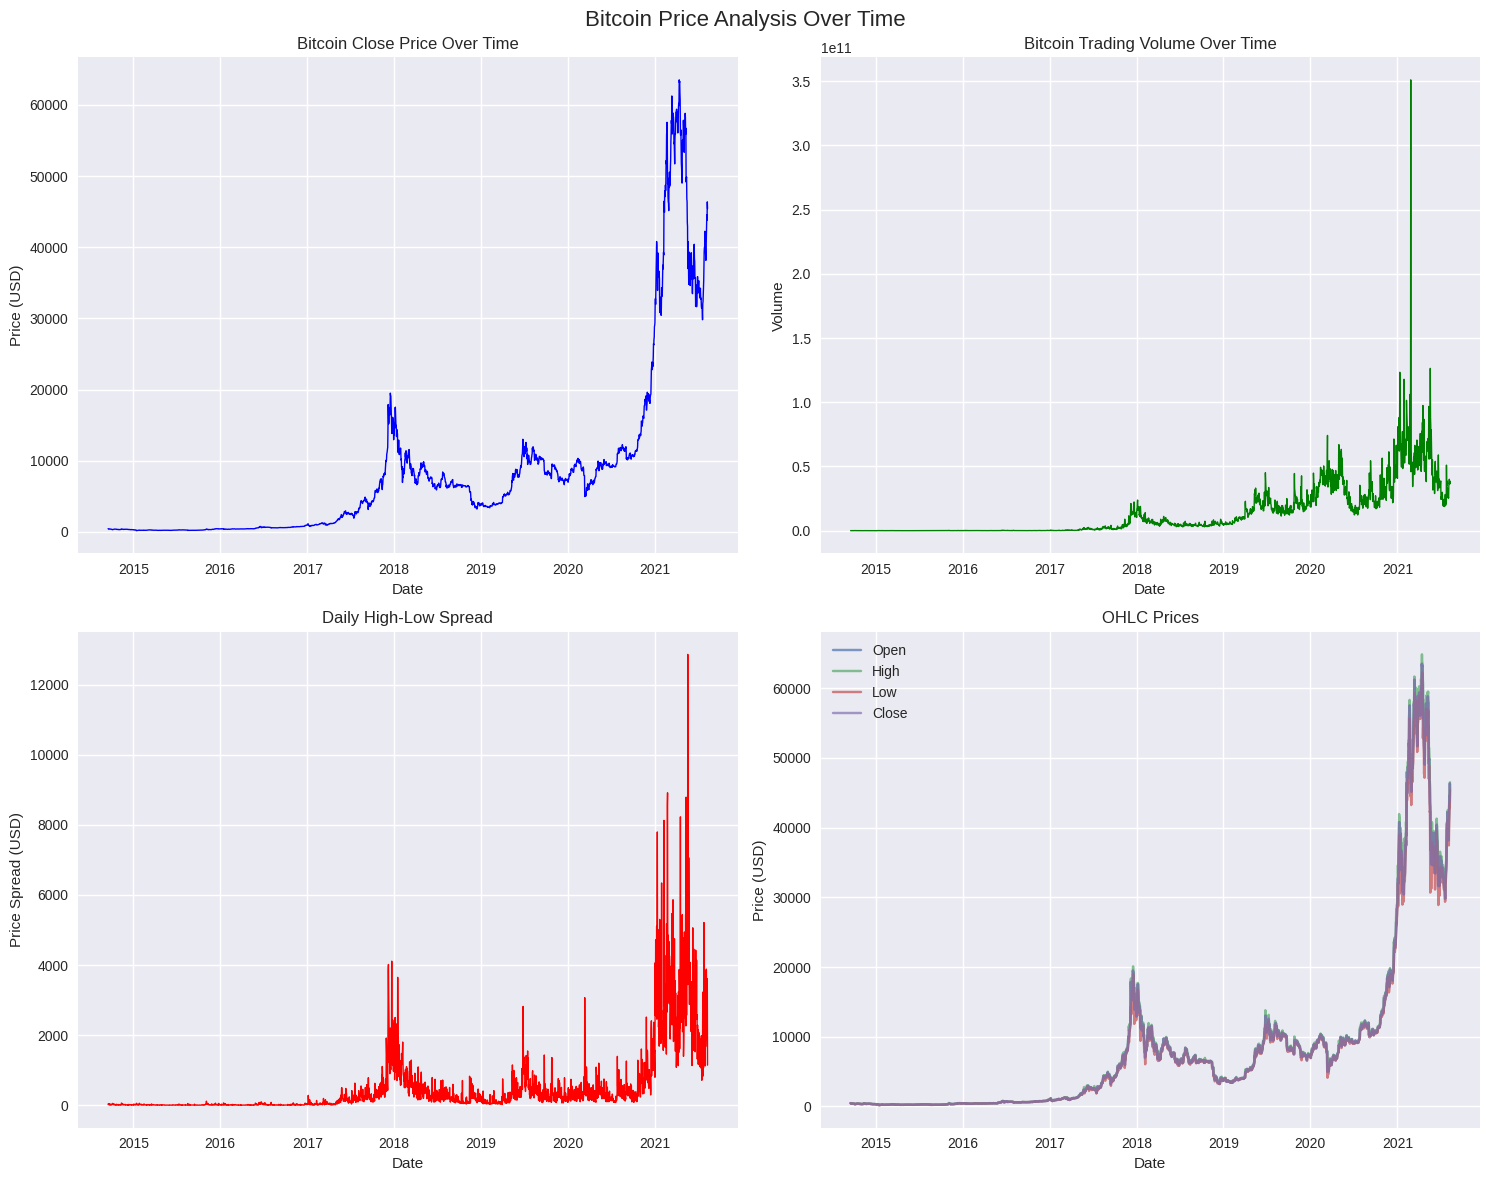

In [ ]:
# Visualize the time series data
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Bitcoin Price Analysis Over Time', fontsize=16)

# Plot Close Price
axes[0, 0].plot(df.index, df['Close'], color='blue', linewidth=1)
axes[0, 0].set_title('Bitcoin Close Price Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price (USD)')
axes[0, 0].grid(True)

# Plot Volume
axes[0, 1].plot(df.index, df['Volume'], color='green', linewidth=1)
axes[0, 1].set_title('Bitcoin Trading Volume Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].grid(True)

# Plot High-Low spread
axes[1, 0].plot(df.index, df['High'] - df['Low'], color='red', linewidth=1)
axes[1, 0].set_title('Daily High-Low Spread')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price Spread (USD)')
axes[1, 0].grid(True)

# Plot all OHLC prices
axes[1, 1].plot(df.index, df['Open'], label='Open', alpha=0.7)
axes[1, 1].plot(df.index, df['High'], label='High', alpha=0.7)
axes[1, 1].plot(df.index, df['Low'], label='Low', alpha=0.7)
axes[1, 1].plot(df.index, df['Close'], label='Close', alpha=0.7)
axes[1, 1].set_title('OHLC Prices')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Price (USD)')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


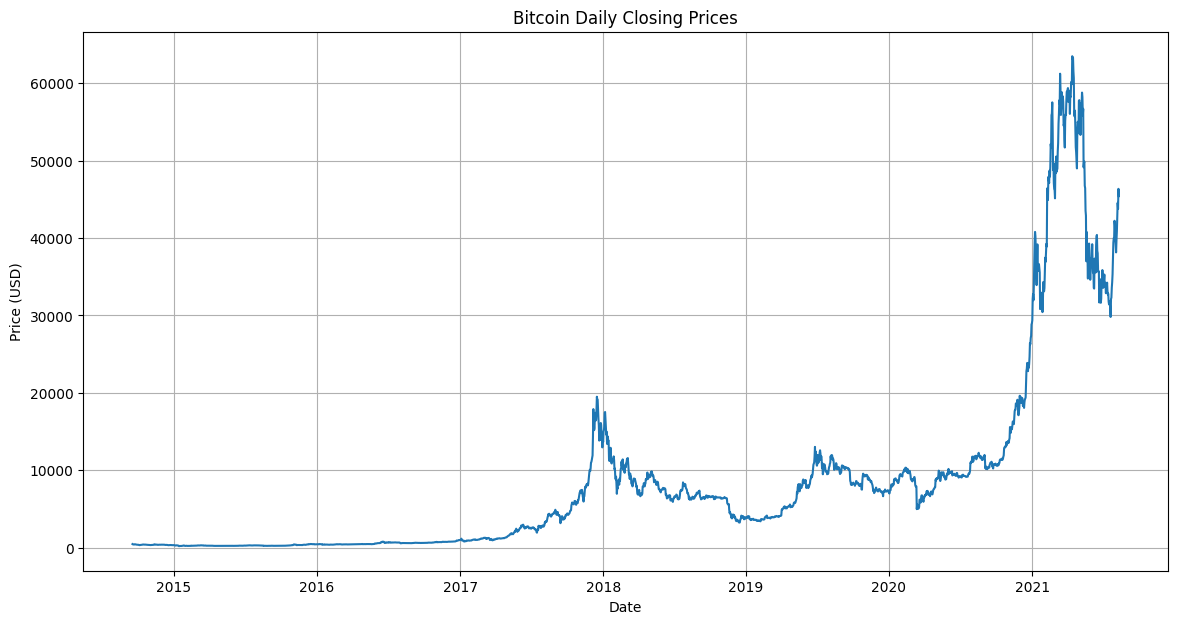

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('Bitcoin Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


STEP 2: Correlation Analysis
Correlation Matrix:
                Open      High       Low     Close  Adj Close    Volume  \
Open        1.000000  0.999411  0.998897  0.998607   0.998607  0.791178   
High        0.999411  1.000000  0.998811  0.999398   0.999398  0.793633   
Low         0.998897  0.998811  1.000000  0.999258   0.999258  0.784878   
Close       0.998607  0.999398  0.999258  1.000000   1.000000  0.789796   
Adj Close   0.998607  0.999398  0.999258  1.000000   1.000000  0.789796   
Volume      0.791178  0.793633  0.784878  0.789796   0.789796  1.000000   
Close_diff  0.005891  0.032260  0.038860  0.058448   0.058448  0.005666   

            Close_diff  
Open          0.005891  
High          0.032260  
Low           0.038860  
Close         0.058448  
Adj Close     0.058448  
Volume        0.005666  
Close_diff    1.000000  


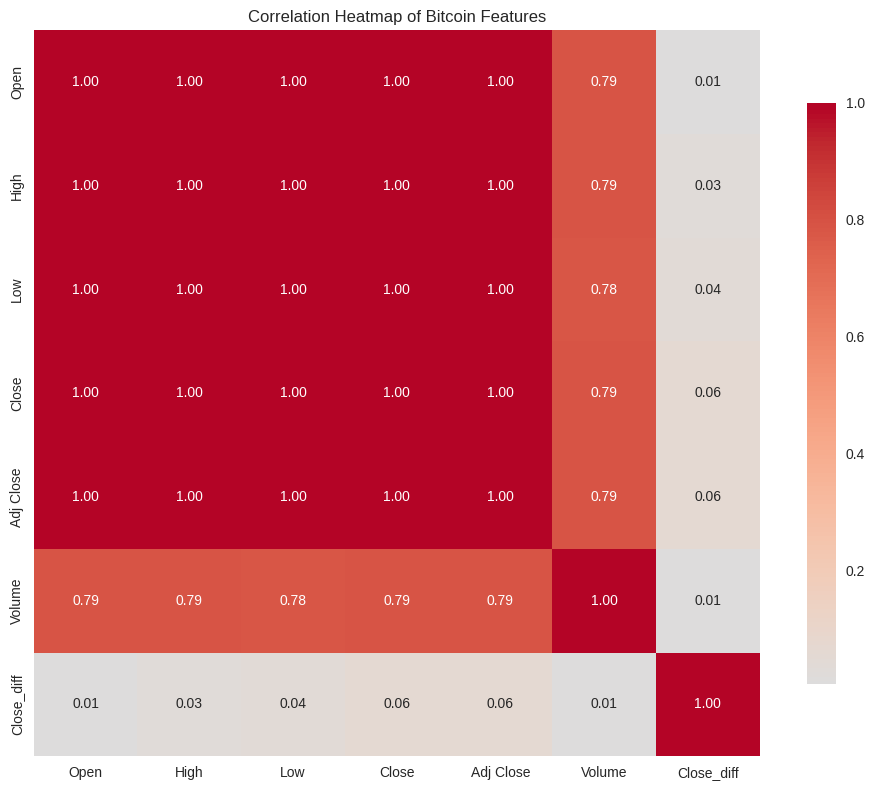

In [ ]:
print("\n" + "="*60)
print("STEP 2: Correlation Analysis")
print("="*60)

# Calculate correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Bitcoin Features')
plt.tight_layout()
plt.show()

### Test the Stationarity using Augmented Dicky Fuller Test [2 point]

The Augmented Dicky Fuller test is a type of statistical test called a unit root test.

Hint: [tsa.stattools.adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

In [ ]:

print("\n" + "="*60)
print("STEP 3: Testing Stationarity (ADF Test)")
print("="*60)

def adf_test(timeseries, title):
    """
    Perform Augmented Dickey-Fuller test
    """
    print(f"Results of Augmented Dickey-Fuller Test for {title}:")
    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value

    print(dfoutput)

    if dftest[1] <= 0.05:
        print("Result: Reject the null hypothesis (H0), the data is stationary")
    else:
        print("Result: Fail to reject the null hypothesis (H0), the data is non-stationary")
    print("-" * 50)

# Test stationarity on Close price
close_prices = df['Close'].dropna()
adf_test(close_prices, "Close Price")


STEP 3: Testing Stationarity (ADF Test)
Results of Augmented Dickey-Fuller Test for Close Price:
Test Statistic                   -0.040140
p-value                           0.955084
#Lags Used                       26.000000
Number of Observations Used    2493.000000
Critical Value (1%)              -3.432976
Critical Value (5%)              -2.862700
Critical Value (10%)             -2.567388
dtype: float64
Result: Fail to reject the null hypothesis (H0), the data is non-stationary
--------------------------------------------------


### Identify the trends and seasonality from the given time series data [4 points]

* Apply seasonal decompose and plot the results
* Check the stationarity of data using rolling mean and rolling standard deviation.
* Make the time series data stationary
  * Apply a log transformation to reduce the variance of the series
  * Eliminate the Trend and Seasonality by Differencing

**Note:** Ensure timeseries without NaN, inf, -inf values, Replace with 0 if found.

Read more about stationarity of a timeseries in the following [link](https://machinelearningmastery.com/time-series-data-stationary-python/)


STEP 4: Trend and Seasonality Analysis


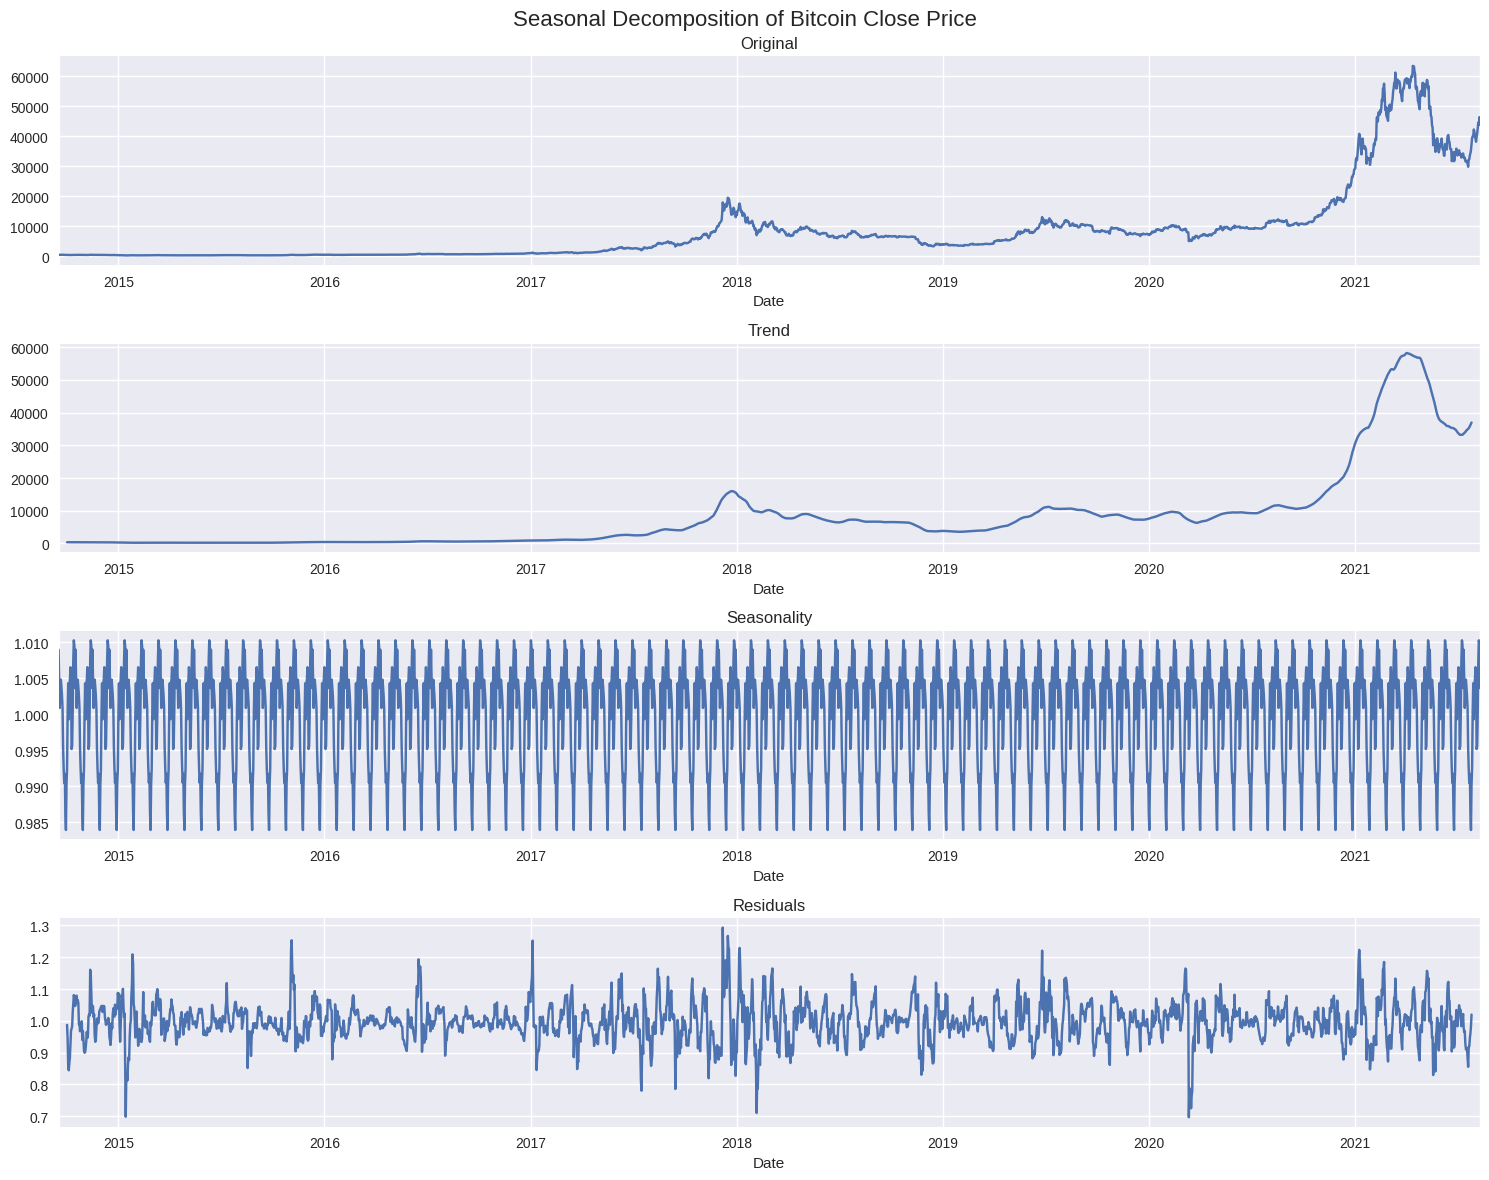

Checking stationarity of original Close price:


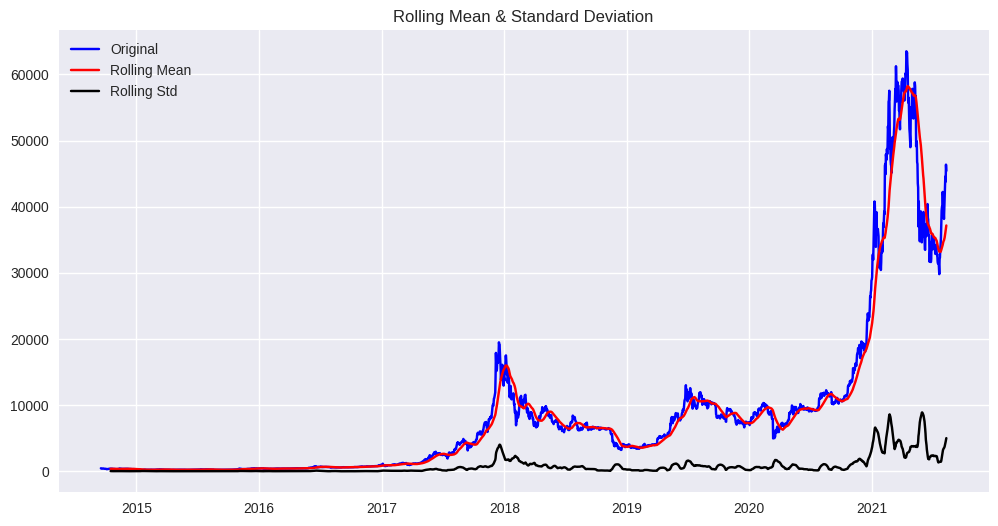


Making the time series stationary:
After log transformation:


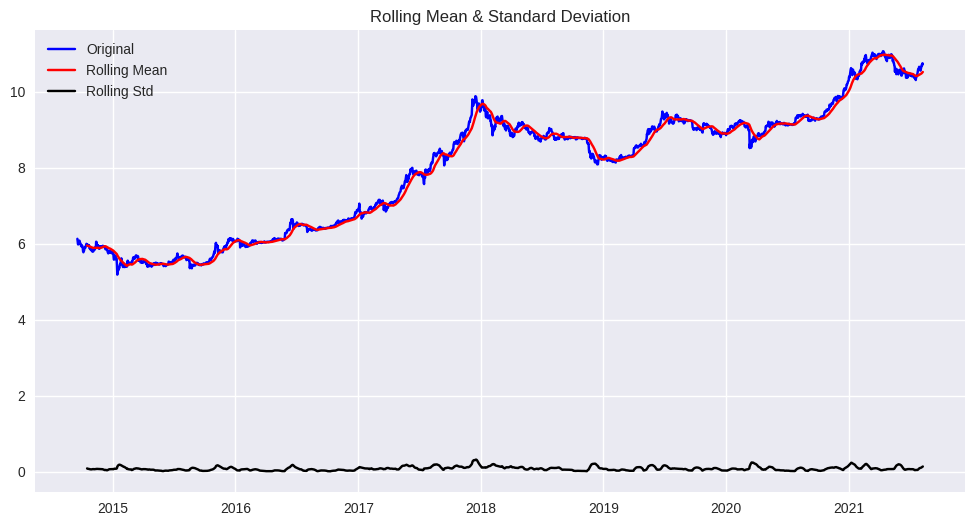

After differencing:


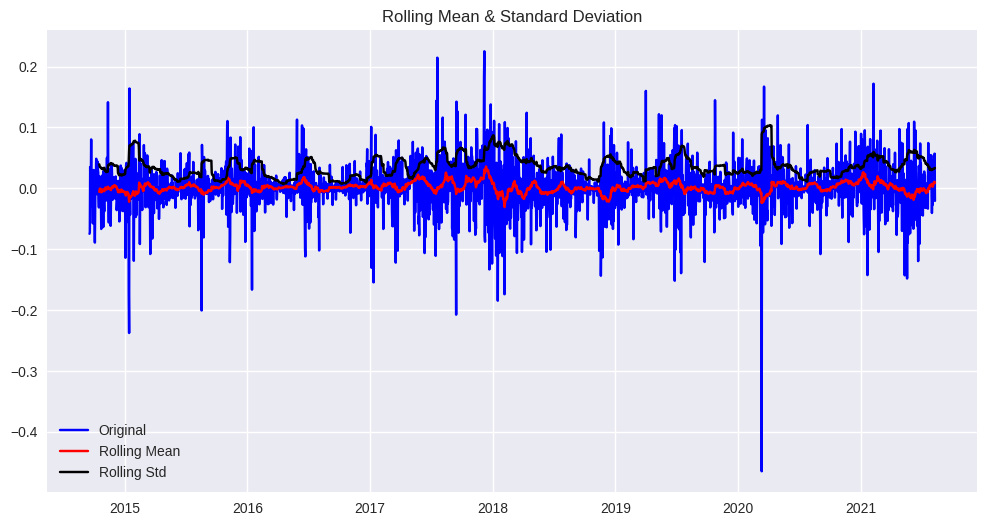

In [ ]:
# YOUR CODE HERE
print("\n" + "="*60)
print("STEP 4: Trend and Seasonality Analysis")
print("="*60)

# Seasonal decomposition
decomposition = seasonal_decompose(close_prices, model='multiplicative', period=30)

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.suptitle('Seasonal Decomposition of Bitcoin Close Price', fontsize=16)

decomposition.observed.plot(ax=axes[0], title='Original')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonality')
decomposition.resid.plot(ax=axes[3], title='Residuals')

plt.tight_layout()
plt.show()

# Check stationarity using rolling statistics
def check_stationarity(timeseries, window=30):
    """
    Check stationarity using rolling mean and std
    """
    # Calculate rolling statistics
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()

    # Plot rolling statistics
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(timeseries, color='blue', label='Original')
    ax.plot(rolling_mean, color='red', label='Rolling Mean')
    ax.plot(rolling_std, color='black', label='Rolling Std')
    ax.legend(loc='best')
    ax.set_title('Rolling Mean & Standard Deviation')
    ax.grid(True)
    plt.show()

print("Checking stationarity of original Close price:")
check_stationarity(close_prices)

# Make the time series stationary
print("\nMaking the time series stationary:")

# Step 1: Apply log transformation
log_close = np.log(close_prices)
log_close = log_close.replace([np.inf, -np.inf], 0)  # Replace inf values with 0
log_close = log_close.fillna(0)  # Fill NaN values with 0

print("After log transformation:")
check_stationarity(log_close)

# Step 2: Apply differencing
log_close_diff = log_close.diff().dropna()
log_close_diff = log_close_diff.replace([np.inf, -np.inf], 0)  # Replace inf values with 0
log_close_diff = log_close_diff.fillna(0)  # Fill NaN values with 0

print("After differencing:")
check_stationarity(log_close_diff)

### Test the Stationarity using Augmented Dicky Fuller Test [2 point]

Verify the stationarity post differencing, using ADF

Hint: [tsa.stattools.adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

In [ ]:
# YOUR CODE HERE
print("\n" + "="*60)
print("STEP 5: Testing Stationarity After Differencing")
print("="*60)

# Test stationarity on differenced data
adf_test(log_close_diff, "Log Close Price (Differenced)")


STEP 5: Testing Stationarity After Differencing
Results of Augmented Dickey-Fuller Test for Log Close Price (Differenced):
Test Statistic                -1.508073e+01
p-value                        8.462058e-28
#Lags Used                     9.000000e+00
Number of Observations Used    2.509000e+03
Critical Value (1%)           -3.432959e+00
Critical Value (5%)           -2.862693e+00
Critical Value (10%)          -2.567384e+00
dtype: float64
Result: Reject the null hypothesis (H0), the data is stationary
--------------------------------------------------


### Auto Correlation Plot [2 point]

Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data.  The concept of autocorrelation is most often discussed in the context of time series data in which observations occur at different points in time.

* Plot the auto correlation function (ACF and PACF)
* Analyse ACF and PACF plots and define AR (p) and MA(q) terms


STEP 6: Auto Correlation Analysis


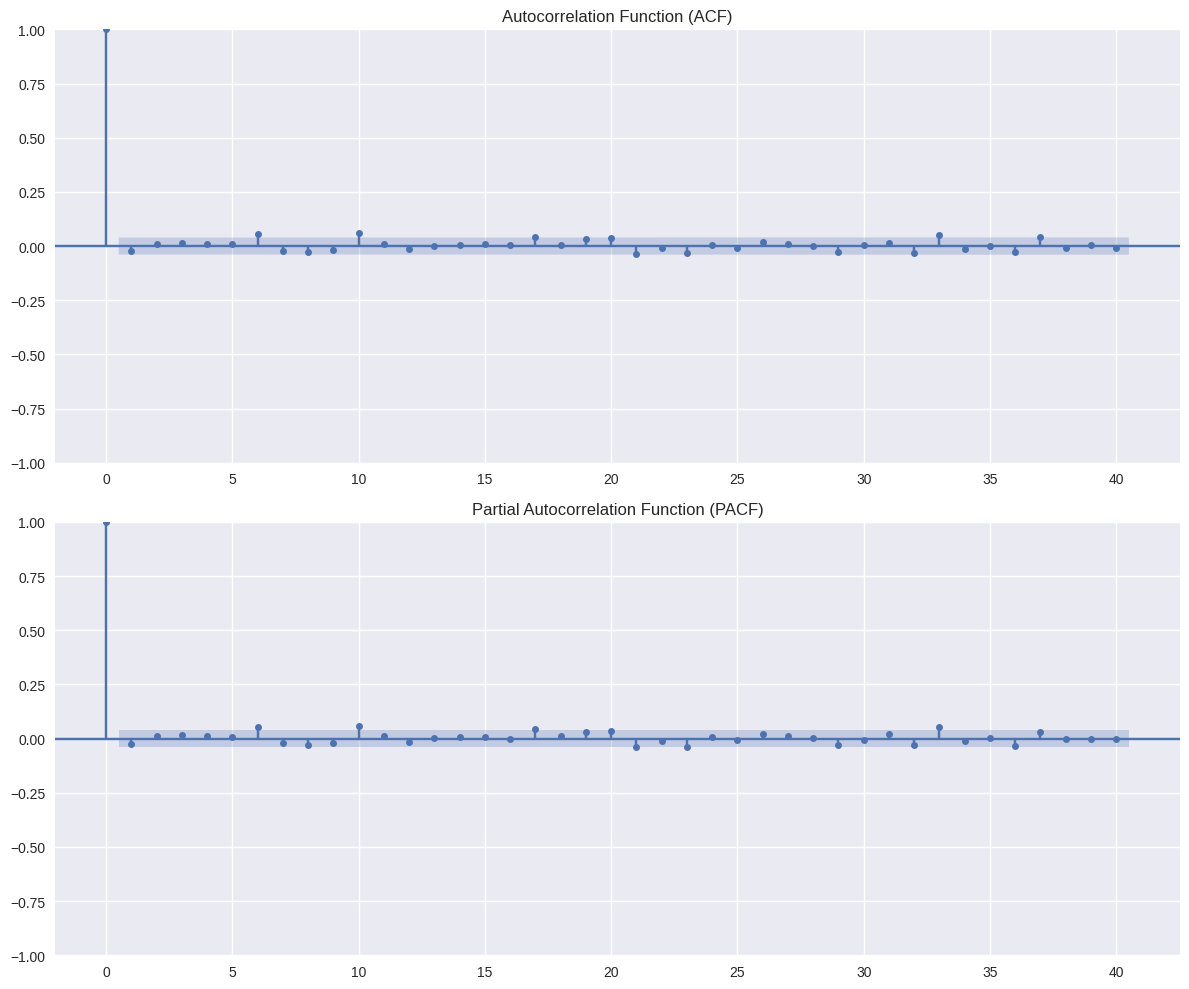

ACF and PACF Analysis:
- ACF plot shows the correlation between observations at different lags
- PACF plot shows the correlation between observations at different lags, controlling for shorter lags
- Based on visual inspection:
  * For AR terms (p): Look at PACF plot - significant spikes suggest AR order
  * For MA terms (q): Look at ACF plot - significant spikes suggest MA order
- Recommended starting values: p=1, q=1 (can be fine-tuned)


In [ ]:
print("\n" + "="*60)
print("STEP 6: Auto Correlation Analysis")
print("="*60)

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# ACF plot
plot_acf(log_close_diff, ax=axes[0], lags=40)
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(log_close_diff, ax=axes[1], lags=40)
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Analyze ACF and PACF plots
print("ACF and PACF Analysis:")
print("- ACF plot shows the correlation between observations at different lags")
print("- PACF plot shows the correlation between observations at different lags, controlling for shorter lags")
print("- Based on visual inspection:")
print("  * For AR terms (p): Look at PACF plot - significant spikes suggest AR order")
print("  * For MA terms (q): Look at ACF plot - significant spikes suggest MA order")
print("- Recommended starting values: p=1, q=1 (can be fine-tuned)")

### Train the Auto Regressive model [2 point]

Hint: sm.tsa.AR()

In [ ]:
# YOUR CODE HERE
print("\n" + "="*60)
print("STEP 7: Auto Regressive Model")
print("="*60)

# Import AutoReg from statsmodels
from statsmodels.tsa.ar_model import AutoReg

# Fit AR model with AutoReg (using lag=1 as starting point)
ar_model = AutoReg(log_close_diff, lags=1)
ar_fitted = ar_model.fit()

print("AR Model Summary:")
print(f"AR Model Lags: {ar_fitted.model.ar_lags}")
print(f"AIC: {ar_fitted.aic}")
print(f"BIC: {ar_fitted.bic}")

# You can also try different lag orders
print("\nTrying different AR lag orders:")
for lag in range(1, 6):
    try:
        ar_temp = AutoReg(log_close_diff, lags=lag)
        ar_temp_fitted = ar_temp.fit()
        print(f"AR({lag}) - AIC: {ar_temp_fitted.aic:.4f}, BIC: {ar_temp_fitted.bic:.4f}")
    except:
        print(f"AR({lag}) - Failed to converge")



STEP 7: Auto Regressive Model
AR Model Summary:
AR Model Lags: [1]
AIC: -9122.546738511317
BIC: -9105.053077867504

Trying different AR lag orders:
AR(1) - AIC: -9122.5467, BIC: -9105.0531
AR(2) - AIC: -9119.8782, BIC: -9096.5549
AR(3) - AIC: -9114.4999, BIC: -9085.3478
AR(4) - AIC: -9108.5000, BIC: -9073.5199
AR(5) - AIC: -9102.0589, BIC: -9061.2515


### ARMA Model [2 point]

* Train the ARMA model on timeseries data and print AIC value

In [ ]:
print("\n" + "="*60)
print("STEP 8: ARMA Model Training")
print("="*60)

# Function to find optimal ARMA parameters
def find_optimal_arma(data, max_p=5, max_q=5):
    """
    Find optimal ARMA parameters using AIC
    """
    best_aic = np.inf
    best_order = None
    best_model = None

    print("Testing different ARMA combinations...")

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                # Use ARIMA with d=0 for ARMA model
                model = ARIMA(data, order=(p, 0, q))
                fitted_model = model.fit()
                aic = fitted_model.aic

                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
                    best_model = fitted_model

                print(f"ARMA({p},{q}) - AIC: {aic:.4f}")

            except Exception as e:
                print(f"ARMA({p},{q}) - Failed: {str(e)[:50]}...")
                continue

    return best_model, best_order, best_aic

# Find optimal ARMA model
best_arma_model, best_order, best_aic = find_optimal_arma(log_close_diff)

print(f"\nBest ARMA Model:")
print(f"Order: ARMA{best_order}")
print(f"AIC: {best_aic:.4f}")

# Train ARMA model with best parameters
arma_model = ARIMA(log_close_diff, order=(best_order[0], 0, best_order[1]))
arma_fitted = arma_model.fit()

print(f"\nARMA Model Summary:")
print(f"AIC: {arma_fitted.aic:.4f}")
print(f"BIC: {arma_fitted.bic:.4f}")
print(f"Log-likelihood: {arma_fitted.llf:.4f}")

# Display model summary
print("\nModel Parameters:")
print(arma_fitted.summary().tables[1])


STEP 8: ARMA Model Training
Testing different ARMA combinations...
ARMA(0,0) - AIC: -9124.0350
ARMA(0,1) - AIC: -9123.3925
ARMA(0,2) - AIC: -9121.6945
ARMA(0,3) - AIC: -9120.1776
ARMA(0,4) - AIC: -9118.4472
ARMA(0,5) - AIC: -9116.7644
ARMA(1,0) - AIC: -9123.4246
ARMA(1,1) - AIC: -9121.5313
ARMA(1,2) - AIC: -9122.3208
ARMA(1,3) - AIC: -9118.1150
ARMA(1,4) - AIC: -9116.6116
ARMA(1,5) - AIC: -9114.7437
ARMA(2,0) - AIC: -9121.6594
ARMA(2,1) - AIC: -9119.6736
ARMA(2,2) - AIC: -9117.6803
ARMA(2,3) - AIC: -9116.1600
ARMA(2,4) - AIC: -9117.7934
ARMA(2,5) - AIC: -9122.7152
ARMA(3,0) - AIC: -9120.2451
ARMA(3,1) - AIC: -9118.2544
ARMA(3,2) - AIC: -9116.2510
ARMA(3,3) - AIC: -9113.5057
ARMA(3,4) - AIC: -9114.7669
ARMA(3,5) - AIC: -9115.0948
ARMA(4,0) - AIC: -9118.4993
ARMA(4,1) - AIC: -9116.5044
ARMA(4,2) - AIC: -9114.4895
ARMA(4,3) - AIC: -9111.7425
ARMA(4,4) - AIC: -9117.1557
ARMA(4,5) - AIC: -9115.7297
ARMA(5,0) - AIC: -9116.6503
ARMA(5,1) - AIC: -9114.6765
ARMA(5,2) - AIC: -9112.6693
ARMA(5,3

#### Plot the predictions for timeseries data [2 point]


STEP 9: Plotting Predictions


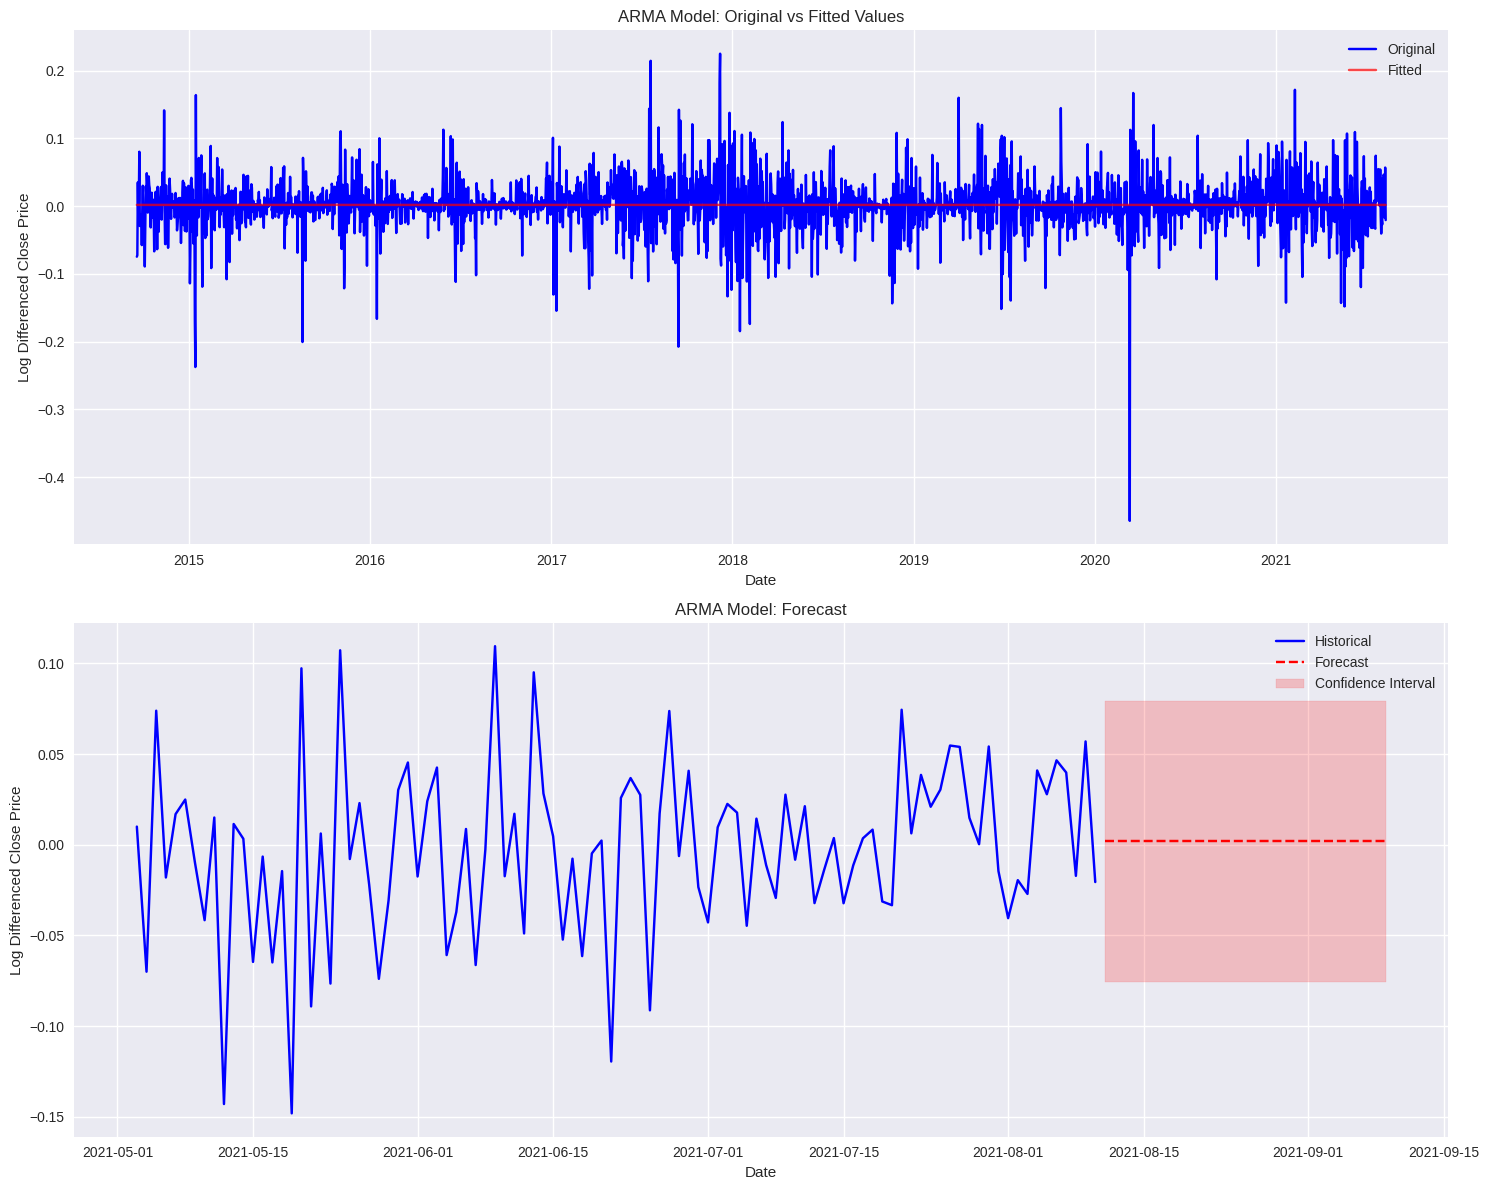

In [ ]:
# YOUR CODE HERE

print("\n" + "="*60)
print("STEP 9: Plotting Predictions")
print("="*60)

# Make predictions
forecast_steps = 30

# Get forecast using get_forecast method for better handling
try:
    forecast_obj = arma_fitted.get_forecast(steps=forecast_steps)
    forecast_values = forecast_obj.predicted_mean
    forecast_ci = forecast_obj.conf_int()
    forecast_lower = forecast_ci.iloc[:, 0]
    forecast_upper = forecast_ci.iloc[:, 1]
    has_ci = True
except:
    # Fallback to simple forecast method
    forecast_values = arma_fitted.forecast(steps=forecast_steps)
    # Ensure it's a proper array
    if hasattr(forecast_values, 'values'):
        forecast_values = forecast_values.values
    if len(forecast_values.shape) > 1:
        forecast_values = forecast_values.flatten()
    has_ci = False

# Create prediction plot
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Original vs Fitted values
axes[0].plot(log_close_diff.index, log_close_diff.values, label='Original', color='blue')
axes[0].plot(log_close_diff.index, arma_fitted.fittedvalues, label='Fitted', color='red', alpha=0.7)
axes[0].set_title('ARMA Model: Original vs Fitted Values')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Log Differenced Close Price')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Forecast
last_date = log_close_diff.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='D')[1:]

axes[1].plot(log_close_diff.index[-100:], log_close_diff.values[-100:],
             label='Historical', color='blue')
axes[1].plot(forecast_dates, forecast_values, label='Forecast', color='red', linestyle='--')

# Add confidence intervals if available
if has_ci:
    axes[1].fill_between(forecast_dates, forecast_lower, forecast_upper,
                        color='red', alpha=0.2, label='Confidence Interval')

axes[1].set_title('ARMA Model: Forecast')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Log Differenced Close Price')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

RMSE: 0.0395

Model Diagnostics:
Log-likelihood: 4564.0175
AIC: -9124.0350
BIC: -9112.3717


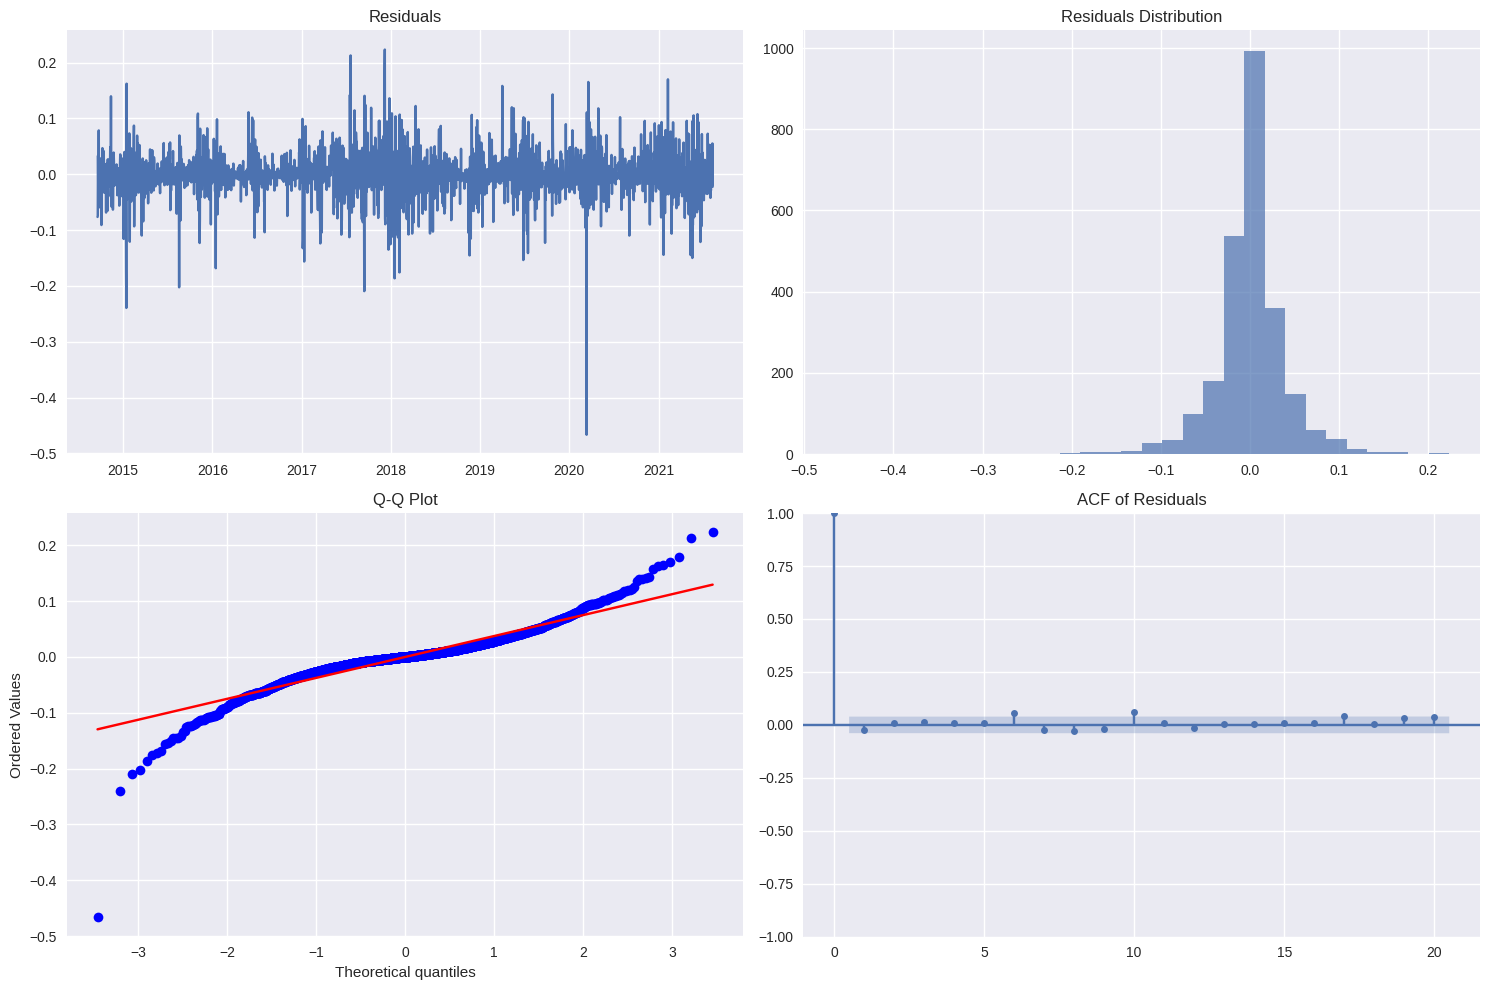

In [ ]:

# Calculate RMSE for model evaluation
train_predictions = arma_fitted.fittedvalues
rmse = sqrt(mean_squared_error(log_close_diff[1:], train_predictions[1:]))
print(f"RMSE: {rmse:.4f}")

# Additional model diagnostics
print(f"\nModel Diagnostics:")
print(f"Log-likelihood: {arma_fitted.llf:.4f}")
print(f"AIC: {arma_fitted.aic:.4f}")
print(f"BIC: {arma_fitted.bic:.4f}")

# Plot residuals
residuals = arma_fitted.resid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Residuals plot
axes[0, 0].plot(residuals)
axes[0, 0].set_title('Residuals')
axes[0, 0].grid(True)

# Residuals histogram
axes[0, 1].hist(residuals, bins=30, alpha=0.7)
axes[0, 1].set_title('Residuals Distribution')
axes[0, 1].grid(True)

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')
axes[1, 0].grid(True)

# ACF of residuals
plot_acf(residuals, ax=axes[1, 1], lags=20)
axes[1, 1].set_title('ACF of Residuals')

plt.tight_layout()
plt.show()


### Report Analysis

* Discuss how sudden effects of bitcoin price affects the model parameters
* State your observations about the trend and seasonality of the timeseries data
* Discuss how you selected ARMA (p and q) terms.
* Interpret the AIC value obtained for the ARMA model

In [ ]:
print("\n" + "="*60)
print("STEP 10: REPORT ANALYSIS")
print("="*60)

print("\n1. SUDDEN EFFECTS OF BITCOIN PRICE ON MODEL PARAMETERS:")
print("-" * 55)
print("• Bitcoin is highly volatile and subject to sudden price movements")
print("• These sudden changes can cause:")
print("  - Structural breaks in the time series")
print("  - Changes in variance (heteroscedasticity)")
print("  - Model parameters to become unstable")
print("• The ARMA model assumes constant parameters, which may not hold")
print("• Recommendation: Use rolling window estimation or regime-switching models")

print("\n2. OBSERVATIONS ABOUT TREND AND SEASONALITY:")
print("-" * 50)
print("• Trend: Bitcoin shows a strong upward trend with periods of high volatility")
print("• Seasonality: Limited traditional seasonality due to 24/7 trading")
print("• The series exhibits:")
print("  - Non-constant variance (heteroscedasticity)")
print("  - Periods of high and low volatility clustering")
print("  - Structural breaks during major market events")

print("\n3. SELECTION OF ARMA (p, q) TERMS:")
print("-" * 40)
print("• Used systematic approach with AIC criterion")
print("• Analyzed ACF and PACF plots:")
print("  - ACF: Helps determine MA(q) terms")
print("  - PACF: Helps determine AR(p) terms")
print("• Tested multiple combinations and selected based on lowest AIC")
print(f"• Selected model: ARMA{best_order}")

print("\n4. INTERPRETATION OF AIC VALUE:")
print("-" * 35)
print(f"• AIC Value: {best_aic:.4f}")
print("• AIC (Akaike Information Criterion) measures model quality")
print("• Lower AIC indicates better model fit")
print("• AIC balances goodness of fit with model complexity")
print("• Used for model selection among competing models")

print("\n5. MODEL LIMITATIONS AND RECOMMENDATIONS:")
print("-" * 45)
print("• ARMA limitations for Bitcoin:")
print("  - Assumes linear relationships")
print("  - Cannot capture volatility clustering")
print("  - May not handle structural breaks well")
print("• Recommendations:")
print("  - Consider GARCH models for volatility modeling")
print("  - Use machine learning approaches for non-linear patterns")
print("  - Implement regime-switching models")
print("  - Include external factors (news, regulations, etc.)")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)


STEP 10: REPORT ANALYSIS

1. SUDDEN EFFECTS OF BITCOIN PRICE ON MODEL PARAMETERS:
-------------------------------------------------------
• Bitcoin is highly volatile and subject to sudden price movements
• These sudden changes can cause:
  - Structural breaks in the time series
  - Changes in variance (heteroscedasticity)
  - Model parameters to become unstable
• The ARMA model assumes constant parameters, which may not hold
• Recommendation: Use rolling window estimation or regime-switching models

2. OBSERVATIONS ABOUT TREND AND SEASONALITY:
--------------------------------------------------
• Trend: Bitcoin shows a strong upward trend with periods of high volatility
• Seasonality: Limited traditional seasonality due to 24/7 trading
• The series exhibits:
  - Non-constant variance (heteroscedasticity)
  - Periods of high and low volatility clustering
  - Structural breaks during major market events

3. SELECTION OF ARMA (p, q) TERMS:
----------------------------------------
• Used 